# **Introducción**

**Contexto de Negocio**

¿Cuáles son las razones por las que las personas pueden cancelar las reservas de hotel?
Los nuevos canales de reserva online en hoteles han cambiado drásticamente la gestion de reserva y el comportamiento de los clientes. Un gran numero de reservas de hotel son modificadas diariamente debido a cancelaciones o abstenciones. Las razones típicas de cancelaciones son por cambio de planes, conflictos de programación, entre otras. Esto a menudo se hace más fácil por la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es un factor menos beneficioso y que posiblemente aumente los costos para los hoteles.

El costo de la cancelación de las reservas recae en el hotel, donde debe disponer de tiempo y recursos para resolver el problema. ¿Cómo podemos averiguar qué reservas tienen una mayor probabilidad de ser canceladas para que podamos tomar medidas preventivas para evitar que se desperdicie tiempo y recursos adicionales?


**Problema de Negocio**

Debemos responder, ¿Qué características son más importantes para determinar si un cliente cancelara una reserva?

**Contexto analítico**

Tenemos disponible los siguientes datos que han sido recopilados por la empresa:
1.	El archivo “Hotel Reservations.csv” contiene el historial de las reservas realizadas en el Hotel
Como primer paso, (1) se analizaran los datos existentes, detectando posibles deficiencias, (2) se extraerán los datos y se realizara limpieza de datos, EDA, entre otros y por ultimo (3) se creara un modelo predictivo en base a la identificación de patrones.


**Procedimiento de análisis**

El trabajo se enfocara en un modelo de predicciones para luego interpretar los datos obtenidos, con la finalidad de detectar la probabilidad de cancelacion de las reservas.
En una primera etapa, verificaremos la/las variables que mejor explican si un cliente tiene tendencia a cancelar la reseva, como puede cantidad de personas, hijos, pedidos especiales, forma de reserva, entre otras.
Una vez definidas las variables claves armaremos los modelos y seleccionaremos el que mejor se ajuste a la realidad del negocio

Mediante el modelo obtenido, el hotel podrá predecir la probabilidad de cancelacion de reservas de los **clientes**, con el fin de personalizar las campañas publicitarias y realizar mejor en los productos, servicios y atención brindada.

## Preguntas de interés

* Cuales variables debo analizar para reducir la cantidad de cancelaciones en las reservas de alojamiento?
* Puedo hacer algo desde mi lugar para disminuir la cantidad de cancelaciones en las reservas?
* Dispongo de suficiente informacion para crear un Modelo predictivo acerca de las cancelaciones de reservas de Hotel?
* En caso de queres invertir dinero en el Hotel, puedo enfocarme en las variables con mayor correlacion negativa respecto a las cancelaciones?








# **StoryTelling Reservas para vacaciones de Invierno**

Dentro de los próximos meses, iniciaran las vacaciones de inviernos y todos los Hoteles de Mendoza se encuentran con una ocupación del 100% en sus reservas. Ante esta particularidad post pandemia, donde las personas quieren vacacionar fuera de las ciudades, un Hotel muy reconocido de Bariloche esta preparando un modelo predictivo que le permite predecir cuándo un huésped cancelara su reserva, permitiendo reducir los costos por cancelaciones y dándole la oportunidad a otras personas para que disfruten de sus vacaciones nevadas.

El modelo en cuestión, tomara datos de 36.275 reservas de hoteles durante el año 2017-2018 y 18 variables para predecir si se cancelaran las reservas de las habitaciones del hotel.



1.   Como primera impresión, observamos que mas del 80% de las reservas que se realizaron entre 2017-2018 fueron para 2 personas adultas, dando a entender que se trata de parejas jóvenes sin hijos.

2.  Continuando con las reservas, en segundo lugar encontramos reservas para una sola persona, lo cual podríamos pensar que están por trabajo.

En base a esto, podríamos preguntarnos sobre el tipo de habitación que debería ofrecer el Hotel para maximizar ganancias.

2.   Otro dato relevante sobre la infraestructura del Hotel, es que no es habitual que se solicite parking al momento de la reserva.

Esto podría deberse a que los huéspedes suelen ir en avión hasta Mendoza o que los vehículos pueden quedar en la calle sin necesidad de un parking cerrado.

3.  Observamos que los meses mas concurridos suelen ser Agosto-Diciembre y que no existe una marcada diferencia de precios durante los meses del año.

4. Otra particularidad que observamos que es mas de la mitad de las reservas tienen un pedido especial como pueden ser vista a la cordillera, llevar mascotas, entre otras.











# **Importacion de datos y visualizaciones**


In [ ]:
pip install pandas-profiling

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import f1_score

from pandas_profiling import ProfileReport








url = "https://raw.githubusercontent.com/AndresPittini/Proyect-Coder/main/Hotel%20Reservations.csv"
df = pd.read_csv(url)
df= df.drop("Booking_ID", axis=1)
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isnull().values.any()

El dataset no contiene datos nulos

In [21]:
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1})

Convertimos a codigo binario

1= No cancelado
0= Cancelado

In [ ]:
profile = ProfileReport(df, title="Hotel Reservation Classification")
profile

Mediante el uso del Panda Profiling podemos hacer un análisis exploratorio de los datos de forma rápida e identificar las principales alertas.
Observamos que no tenemos datos nulos y los datos duplicados ascienden al 8.7%
Del total de columna, tenemos 10 con datos numéricos y 8 con información categórica.

En cuanto a las alertas, nos indica que tenemos 3138 datos duplicados y que existe un alta correlación entre cantidad de reservas no canceladas y si es un huésped habitual.


In [23]:
df['repeated_guest'] = df['repeated_guest'].replace({0:"No", 1:"Si"})
df['required_car_parking_space'] = df['required_car_parking_space'].replace({0:"No", 1:"Si"})

In [24]:
Parametros = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
              'market_segment_type', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Objetivo = 'booking_status'

In [25]:
num_df=df[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","lead_time","arrival_year","arrival_month","arrival_date",
           "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"]]

In [26]:
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)

<ipython-input-26-a3c437dbfd3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)


In [27]:
cat_df=df[['type_of_meal_plan','room_type_reserved','market_segment_type',"required_car_parking_space","repeated_guest","booking_status"]]

**Separamos los datos en dos categorias, numericos y categoricos.**

In [28]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   no_of_adults                          36275 non-null  int64
 1   no_of_children                        36275 non-null  int64
 2   no_of_weekend_nights                  36275 non-null  int64
 3   no_of_week_nights                     36275 non-null  int64
 4   lead_time                             36275 non-null  int64
 5   arrival_year                          36275 non-null  int64
 6   arrival_month                         36275 non-null  int64
 7   arrival_date                          36275 non-null  int64
 8   no_of_previous_cancellations          36275 non-null  int64
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64
 10  avg_price_per_room                    36275 non-null  int64
 11  no_of_special_requests                362

In [29]:
num_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,224,2017,10,2,0,0,65,0
1,2,0,2,3,5,2018,11,6,0,0,106,1
2,1,0,2,1,1,2018,2,28,0,0,60,0
3,2,0,0,2,211,2018,5,20,0,0,100,0
4,2,0,1,1,48,2018,4,11,0,0,94,0


In [30]:
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,required_car_parking_space,repeated_guest,booking_status
0,Meal Plan 1,Room_Type 1,Offline,No,No,0
1,Not Selected,Room_Type 1,Online,No,No,0
2,Meal Plan 1,Room_Type 1,Online,No,No,1
3,Meal Plan 1,Room_Type 1,Online,No,No,1
4,Not Selected,Room_Type 1,Online,No,No,1


In [31]:
df.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [32]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.0,3.0,17.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.0,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.0,23.0,31.0
no_of_previous_cancellations,36275.0,0.023349,0.368331,0.0,0.0,0.0,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.153411,1.754171,0.0,0.0,0.0,0.0,58.0


# **Exploratory Data Analysis (EDA)**


<ipython-input-33-c8eeb38980dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


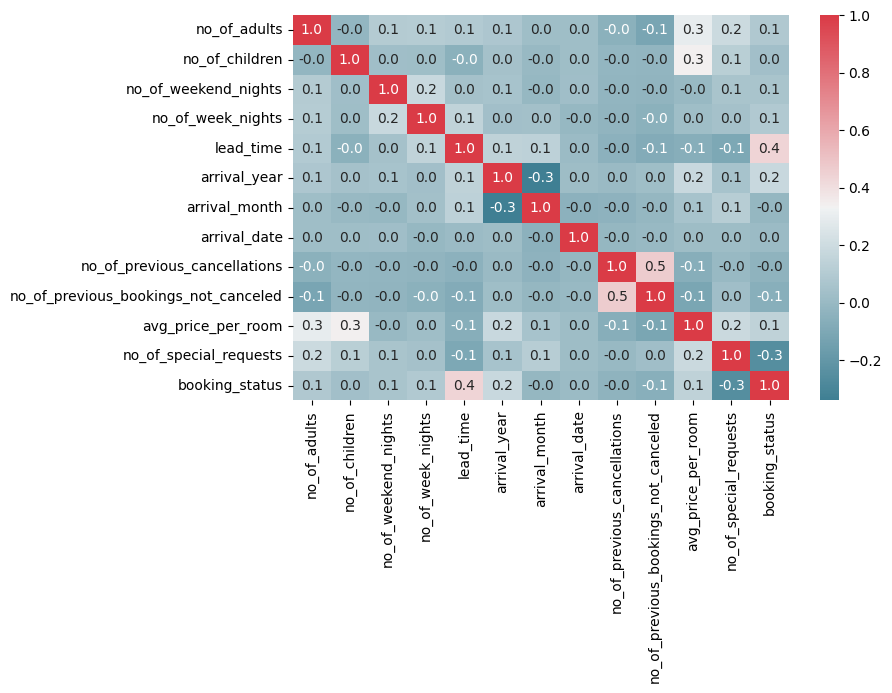

In [33]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (8, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.1f')
fig.show()

In [34]:
abs(corr_matrix['booking_status']).sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64

Eliminamos el dia y mes de llegada, dado que tienen poca correlacion con el estado de la reserva

In [35]:
del(num_df['arrival_date'])

In [36]:
del(num_df['arrival_month'])

In [37]:
num_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,224,2017,0,0,65,0
1,2,0,2,3,5,2018,0,0,106,1
2,1,0,2,1,1,2018,0,0,60,0
3,2,0,0,2,211,2018,0,0,100,0
4,2,0,1,1,48,2018,0,0,94,0


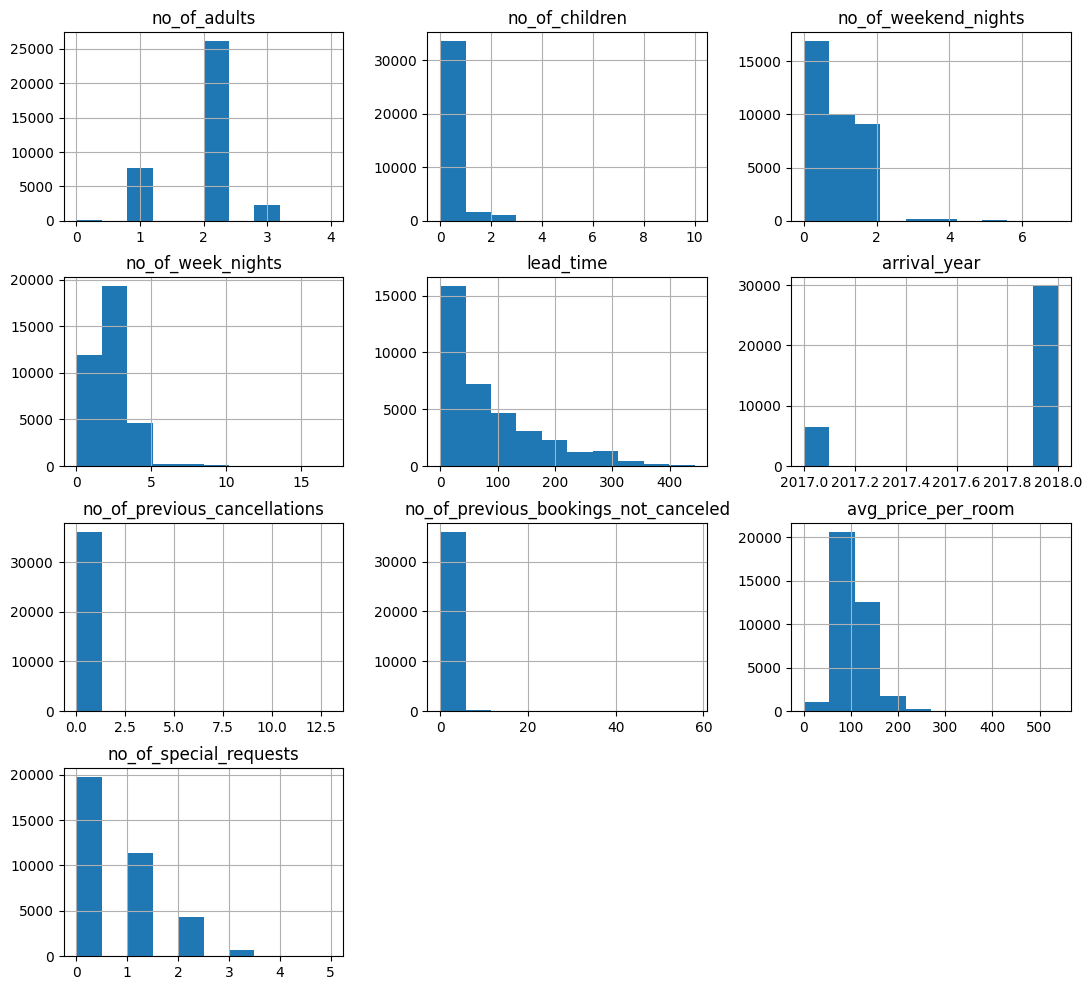

In [38]:
num_df.hist(bins=10, figsize=(13, 12))
plt.show()

Observaciones:

1-En su mayoria, las reservas realizadas son para 2 huespedes.

2-Cerca del 90% de las reservas, no incluyen hijos.

3-La mitad de las reservas, incluyen al menos 1 dia de fin de semana

4-Parking para vehiculo no es algo muy solicitado

5-El 50% de las reservas se realizan dentro de los 60 dias previos al check in

6-Disponemos de pocos datos del 2017, puede suceder que se comenzo a mitad de año o posterior.

7-Los meses de Agosto-Diciembre son los mas concurridos

8-No existe una tendencia marcada en el dia del mes

9-Los clientes no suelen repetir alojamiento en el mismo Hotel

10-Los clientes no suelen cancelar el alojamiento una vez que reservaron.

11-El precio promedio por noche ronda los 100 dolares

12-Cerca de la mitad de las reservas, tiene al menos un pedido especial.

**13-Una tercera parte de las reservas, son canceladas**


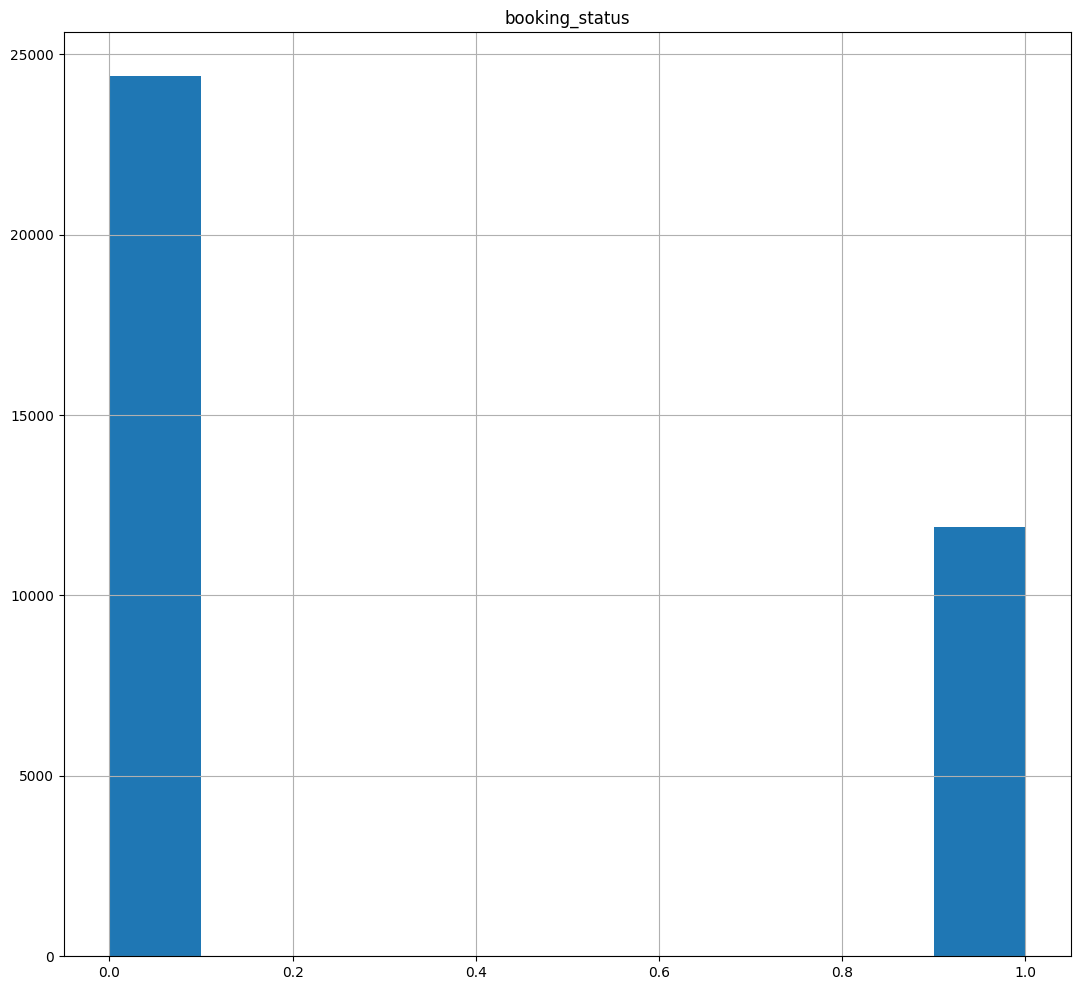

In [39]:
cat_df.hist(bins=10, figsize=(13, 12))
plt.show()

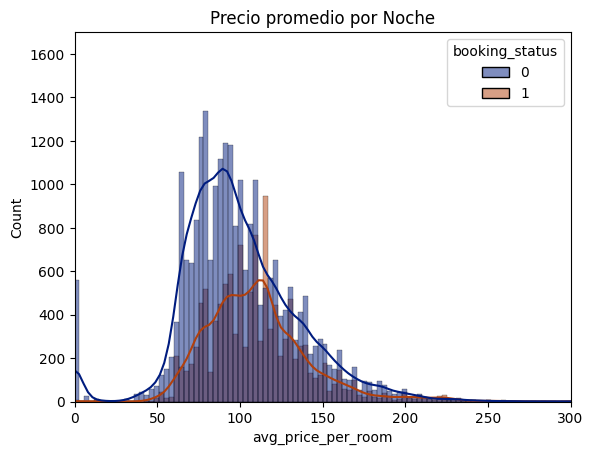

In [40]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=df, kde=True, palette="dark",bins=180)
plt.ylim(0,1700)
plt.xlim(0,300)
plt.title("Precio promedio por Noche");

In [41]:
pd.pivot_table(df, index = 'booking_status', values = ['avg_price_per_room'])

,avg_price_per_room
booking_status,
0,99.931412
1,110.589966


Estamos buscando si existe alguna correlación para el Hotel de Mendoza entre el precio por noche de las reservas y la posibilidad de que la misma sea cancelada, tal como surgen los datos no existe una diferencia sustancial entre el precio de las reservas concretadas y las reservas canceladas.

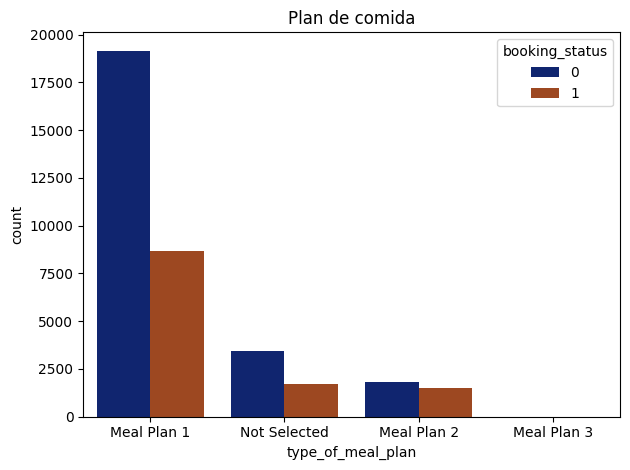

In [42]:
sns.countplot(x='type_of_meal_plan', hue="booking_status", data=df, palette="dark")
plt.title("Plan de comida")
plt.tight_layout()


Los planes de comida son un atractivo muy importante en los Hoteles, principalmente para los extranjeros que les gusta probar la comida autóctona de la zona, dentro del menú disponible del Hotel tenemos 3 planes de comida el cual es posible seleccionar al momento de la reserva, con el fin de tener todo listo para el día del alojamiento.
El menú que sobresale por su gran variedad de alimentos es el plan Nro 1, el cual es seleccionado mas del 80% de las veces.


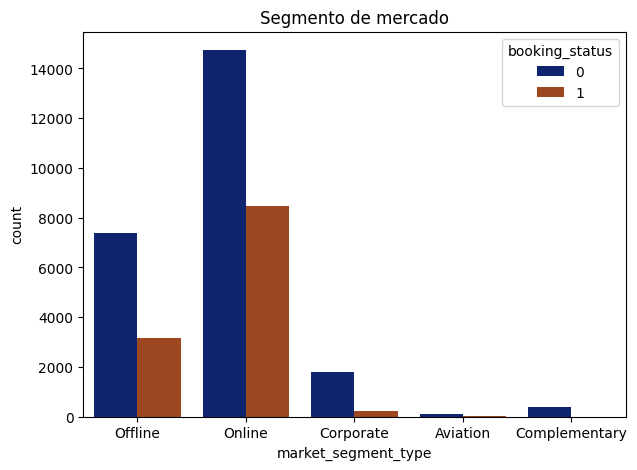

In [43]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='market_segment_type', hue="booking_status", data=df, palette="dark")
plt.title("Segmento de mercado")
plt.show()

Ante las nuevas tecnologías que disponemos dentro del Hotel, una de ella es la de gestionar a la reserva de forma online vía red social, WhatsApp o página web permitiendo al propio huésped realizar su reserva desde la comodidad de su hogar y disponer en vivo de la disponibilidad para asegurarle unas vacaciones placenteras.
Gracias a la inversión en sistemas de gestión de reservas, la cual funciona excelentemente, observamos que mas del 70% de las reservas se realizaron vía online, permitiendo una mejor logística para el Hotel y facilidad para el huésped.


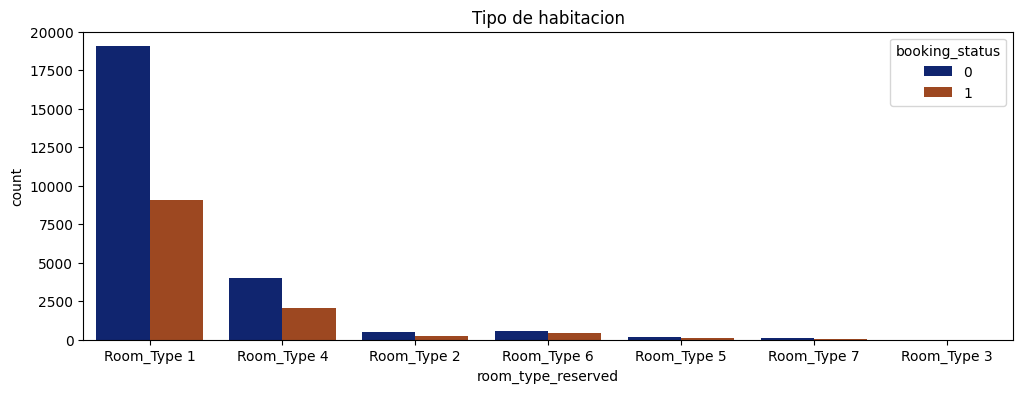

In [44]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x='room_type_reserved', hue="booking_status", data=df, palette="dark")
plt.title("Tipo de habitacion")
plt.show()

El servicio por excelente de los Hoteles es brindar un hospedaje ameno a sus huéspedes y esto incluye una habitación acorde a las vacaciones que se merecen nuestros huéspedes. Para cumplir con los estándares esperados por los clientes, el Hotel ofrece 7 distintas habitaciones con diferencias capacidades y comodidades.
Asociado a la cantidad de adultos que suelen reservar alojamiento en el Hotel (2), notamos que la habitación Nro 1 y 4 son las mas frecuentadas.




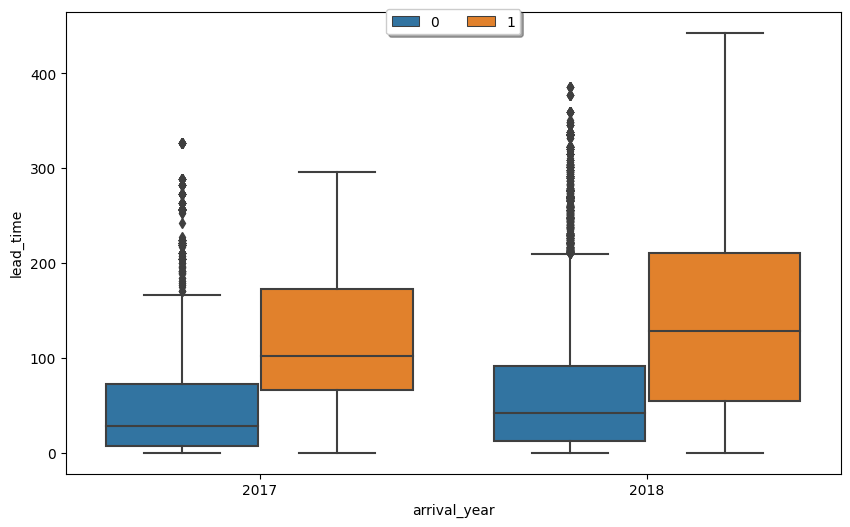

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "lead_time", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

La cantidad de días entre que se reserva y la fecha de check in es muy importante para identificar las reservas que podrán ser canceladas (alta correlación), esto se puede dar por una mayor incertidumbre por parte del huésped y cambios de planes que puedan surgir.
Esto mismo se observó en el análisis realizado, las reservas mayores a 60 días tienen mayor tendencia a ser canceladas, tanto para el año 2017 como 2018.


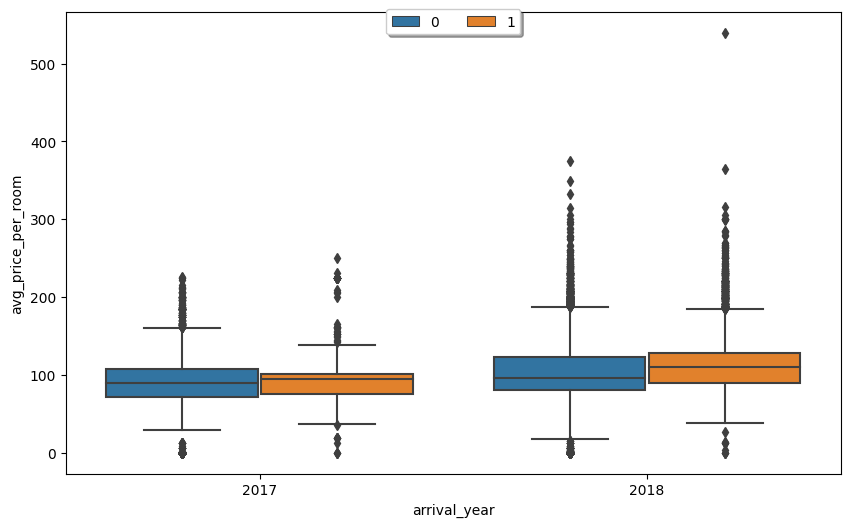

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "avg_price_per_room", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

No se observan diferencias de precios que indiquen una tendencia a cancelar la reserva

# **Modelos de Machine Learning**

In [47]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')

df.info()

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df[Parametros], df[Objetivo])
sns.countplot(y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
def plot_cm(model, X, y, format='.3f'):
    """Plot confusion matrix"""
    ConfusionMatrixDisplay.from_estimator(model, X, y,values_format=format,cmap='Blues',normalize='true')
    plt.show()

In [75]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('La exactitud del entrenamiento es:', accuracy_score(y_train, yt_pred))
    print('La exactitud del testeo es:', accuracy_score(y_test, y_pred))
    print('EL ROC del modelo es:', roc_auc_score(y_test,y_pred))
    return [(accuracy_score(y_train, yt_pred) * 100), (accuracy_score(y_test, y_pred) * 100),
            roc_auc_score(y_test, y_pred)]

**DecisionTree**

In [52]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

0.8930650597487488

In [ ]:
dt1 = model_evaluation(dt)

**RandomForest**

In [81]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred)

0.9201244813278009

In [ ]:
rfc1 = model_evaluation(rfc)

**LogisticRegression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
lr1 = model_evaluation(lr)

**KNeighbors**

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score(y_test, y_pred)

0.8377128235409901

In [ ]:
knn1 = model_evaluation(knn)

**SVM**

In [60]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1_score(y_test, y_pred)

0.6510511882998171

In [ ]:
svm1 = model_evaluation(svm)

In [ ]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [88]:
results = pd.DataFrame(data = [knn1, svm1, dt1, rfc1,lr1],
                       columns = ['Training Accuracy', 'Testing Accuracy', 'Roc_Auc Score'],
                      index = ['KNearestNeighbors', 'SupportVectorMachine', 'DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])

In [89]:
results

,Training Accuracy,Testing Accuracy,Roc_Auc Score
KNearestNeighbors,88.991390,83.097581,0.830926
SupportVectorMachine,69.436757,68.696187,0.687089
DecisionTreeClassifier,99.490057,89.268143,0.892678
RandomForestClassifier,99.490057,92.076671,0.920783
LogisticRegression,78.490160,78.813038,0.788130


# **Conexion API**

In [ ]:
## https://rapidapi.com/tipsters/api/booking-com/    get search hotel

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"checkin_date":"2023-09-27","dest_type":"city","units":"metric","checkout_date":"2023-09-28","adults_number":"2","order_by":"popularity","dest_id":"-553173","filter_by_currency":"AED","locale":"en-gb","room_number":"1","children_number":"2","children_ages":"5,0","categories_filter_ids":"class::2,class::4,free_cancellation::1","page_number":"0","include_adjacency":"true"}

headers = {
	"X-RapidAPI-Key": "b1a2465286msh38aec7a3ca1ae43p17e956jsne0dde0767383",
	"X-RapidAPI-Host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

In [ ]:
import json
from pandas import json_normalize
json_string = json.dumps(response.json())
data = json.loads(json_string)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
data['sort']#seleccionamos la parte de interes

In [ ]:
df2 = pd.DataFrame(data['sort'])
df2

# **Graficos Univariables**

In [ ]:
num_df.head()

In [ ]:
cat_df['booking_status'] = cat_df['booking_status'].replace({0: "Not_Canceled", 1:"Canceled"})

In [ ]:
cat_df.head()

**Variables cuantitativas**

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_adults", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de adultos', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_children", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de hijos', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_weekend_nights", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de dias de fin de semana ', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_week_nights", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel(' Cantidad de dias de entre semana ', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
sns.histplot(data= num_df, x='lead_time', kde=True,bins=50)
plt.title('Cantidad de dias entre la fecha de reseva y la fecha del alojamiento')
plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(6,3))
ax= sns.countplot(x="arrival_year", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Año', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_previous_cancellations", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de cancelaciones previas', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax= sns.countplot(x="no_of_previous_bookings_not_canceled", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de reservas no canceladas', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

In [ ]:
sns.histplot(data= num_df, x='avg_price_per_room', kde=True,bins=50)
plt.title('Precio por noche')
plt.show()

In [ ]:
sns.histplot(data= num_df, x='no_of_special_requests', kde=True,bins=50)
plt.title('Cantidad de pedidos especiales')
plt.show()

**Variables cualitativas**

In [ ]:
plot = cat_df['type_of_meal_plan'].value_counts().plot(kind='bar',title='Planes de comida',edgecolor = "black")
plt.xticks(rotation = 360)

In [ ]:
plot = cat_df['room_type_reserved'].value_counts().plot(kind='bar',title='Tipo de habitacion',edgecolor = "black")
plt.xticks(rotation = 45)

In [ ]:
plot = cat_df['market_segment_type'].value_counts().plot(kind='bar',title='Metodo de reserva',edgecolor = "black")
plt.xticks(rotation = 360)

In [ ]:
plot = cat_df['required_car_parking_space'].value_counts().plot(kind='bar',title='Estacionamiento de vehiculo',edgecolor = "black")
plt.xticks(rotation = 360)

In [ ]:
plot = cat_df['repeated_guest'].value_counts().plot(kind='bar',title='Huesped repite alojamiento',edgecolor = "black")
plt.xticks(rotation = 360)


In [ ]:
plot = cat_df['booking_status'].value_counts().plot(kind='bar',title='Estatus de la reserva',edgecolor = "black")
plt.xticks(rotation = 360)

**StoryTelling en base a graficos univariables**

Como era de esperarse para la provincia de Mendoza, reconocida mundialmente por su naturaleza y tranquilidad, durante las reservas realizadas en 2017-2018 su mayoría fueron para 2 adultos, siendo un lugar turístico muy importe para las parejas jóvenes de Argentina y países vecinos.

Asociada a esta hipótesis, observamos que la gran mayoría de reservas no incluye hijos menores, remarcando que se tratan de parejas jóvenes.

Al tratarse de un paisaje turístico fuera de las ciudades grandes de Argentina, las reservas se realizando tanto para los fines de semanas como días de semana con un promedio de 4-5 noches para gran parte de reservas, distribuido 2 días de fin de semana y 3 días de la semana.

Tal como era de esperarse, las reservas se suelen realizar con muchos días de antelación con el fin de asegurarse el alojamiento y evitar perderse sus vacaciones, siendo la cantidad de cancelaciones previas muy bajas y predominando las reservas online sobre las presenciales.

Mendoza es una zona turística que atrae muchas personas alrededor del mundo, por lo cual los precios pueden ir desde 50 USD a más de USD 250 la noche, ofreciendo una amplia gama de opciones para los huéspedes. Vinculado a esto, es habitual que se ofrezcan distintas opciones de comida, habitación o pedidos especiales con el fin de hacer amena la estadía.


# **Graficos Bivariables** (variables correlacionadas)

In [ ]:
agr = df.groupby(['room_type_reserved', 'no_of_adults']).size().reset_index().pivot(columns='no_of_adults', index='room_type_reserved', values=0)
agr.plot(kind='bar', stacked=True)
plt.xticks(rotation = 360)


In [ ]:
agr = df.groupby(['room_type_reserved', 'no_of_children']).size().reset_index().pivot(columns='no_of_children', index='room_type_reserved', values=0)
agr.plot(kind='bar', stacked=True)
plt.xticks(rotation = 360)

In [ ]:
df['market_segment_type'] = df['market_segment_type'].replace({0:"Aviacion", 1:"Complementario", 2:"Corporativo",3:"Offline",4:"Online"})
agr = df.groupby(['market_segment_type', 'no_of_children']).size().reset_index().pivot(columns='no_of_children', index='market_segment_type', values=0)
agr.plot(kind='bar', stacked=True)
plt.xticks(rotation = 360)

In [ ]:
sns.scatterplot(data=df, x="no_of_adults", y="avg_price_per_room")


In [ ]:
sns.scatterplot(data=df, x="room_type_reserved", y="avg_price_per_room")

In [ ]:
sns.scatterplot(data=df, x="market_segment_type", y="avg_price_per_room")

In [ ]:
df['repeated_guest'] = df['repeated_guest'].replace({0:"No", 1:"Si"})
agr = df.groupby(['repeated_guest', 'no_of_previous_cancellations']).size().reset_index().pivot(columns='no_of_previous_cancellations', index='repeated_guest', values=0)
agr.plot(kind='bar', stacked=True)
plt.xticks(rotation = 360)

In [ ]:
df['booking_status'] = df['booking_status'].replace({0:"No cancelado", 1:"Cancelado"})
sns.boxenplot(data=df, x='booking_status', y = 'lead_time', palette = 'Set3')
plt.title('Relacion entre estado de la reserva y plazo de reserva', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
df['booking_status'] = df['booking_status'].replace({0:"No cancelado", 1:"Cancelado"})
sns.boxenplot(data=df, x='booking_status', y = 'no_of_adults', palette = 'Set3')
plt.title('Relacion entre cantidad de adultos y cancelacion de resevas', fontsize = 20, fontweight = 30)
plt.show()

**StoryTelling en base a graficos bivariables**

Todas las habitaciones del Hotel son super cómodas y confortable, sin embargo, destacamos a las habitaciones número 0 y 3 con sus vistas a la cordillera, siendo estas las más reservadas por los huéspedes, en particular quienes van solos o en pareja. Los precios de las habitaciones no varían mucho entre una y otra, manteniendo un precio promedio de USD 110.

En cuanto a la anticipación para reservar el alojamiento, los huéspedes prefieren realizarlo con anticipación mayor a 150 días con el fin de asegurar la estadía y al contar con cancelación gratuita, se benefician de un menor costo y flexibilidad. En contrapartida, el Hotel este sujeto a esto, lo cual genera mayor incertidumbre sobre cada reserva cuando esta se realizó hace mucho tiempo.



# **Conclusiones finales**

#### Insights Hotel

* Existe una correlación positiva entre el plazo de antelación con la cual se reservó y la cantidad de cancelaciones, por lo cual es una variable a tener en cuenta,
* Como siguiente variable, los pedidos especiales pueden definir si una reserva se cancela o no.
* EL precio de la noche no es una variable relevante, esto se puede deber al reducido margen entre el precio mínimo y máximo.
* Al tratarse de cancelaciones de reservas, esto suele darse por cambio de planes, mejores ofertas, entre otros.


#### Recomendaciones

* Evitar el 100% de las cancelaciones no están en manos del Hotel, dado que existen factores externos que no pueden ser manipulados. Debido a esto, el Hotel debe hacer hincapié en las variables que si puede manipular.

* Si el costo por perdidas de reservas es elevado para el Hotel, debería diseñar una alternativa de reserva que el permita recuperar al menos una parte de la reserva original.


**RandomForest**